<a href="https://colab.research.google.com/github/NainaniJatinZ/Hack_Inversion-SIH/blob/main/Notebooks/PatternRecognition/patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
import datetime
import pylab as p
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

# Pattern definition 

In [ ]:
def pattern(stride, w1, w2, mu1, s1, mu2, s2):
  x3 = np.linspace(mu1 - 3*s1, mu2 + 3*s2, stride)
  y1 = stats.norm.pdf(x3, mu1, s1)
  y2 = stats.norm.pdf(x3, mu2, s2)
  y = w1*y1+w2*y2
  return y

In [ ]:
stride = 130

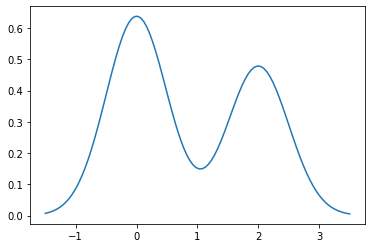

In [ ]:
mu1 = 0  #@param {type:"slider", min:-10, max:10, step:0.1}   
mu2 = 2   #@param {type:"slider", min:-10, max:10, step:0.1}
s1 = 0.5  #@param {type:"slider", min:-1, max:1, step:0.1}
s2 = 0.5  #@param {type:"slider", min:-1, max:1, step:0.1}
w1 = 0.8  #@param {type:"slider", min:0, max:1, step:0.1}
w2 = 0.6   #@param {type:"slider", min:0, max:1, step:0.1}
stride = 100 #@param {type:"slider", min:10, max:200, step:5}
x3 = np.linspace(mu1 - 3*s1, mu2 + 3*s2, stride)
y1 = stats.norm.pdf(x3, mu1, s1)
y2 = stats.norm.pdf(x3, mu2, s2)
y = w1*y1+w2*y2
plt.plot(x3,y)

# Data

In [ ]:
nasd = pd.read_csv('/content/drive/MyDrive/SIH- Hack Inversion/Coding/data/initial_nymex_sma_ema_macd.csv')
nasd.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low,SMA,EMA,MACD
0,0,2022-03-11,4.725,77808.0,4.657,4.797,4.622,2.567271,2.570803,-0.312644
1,1,2022-03-10,4.631,75295.0,4.520,4.671,4.499,2.571329,2.575145,-0.314626
2,2,2022-03-09,4.526,87262.0,4.569,4.625,4.450,2.575793,2.579119,-0.316987
3,3,2022-03-08,4.527,152372.0,4.818,4.882,4.507,2.581071,2.583365,-0.319151
4,4,2022-03-07,4.833,125430.0,5.041,5.184,4.781,2.588343,2.587744,-0.321241


In [ ]:
# nasd = nasd.drop(columns = ['Unnamed: 0'])
nasd = nasd.fillna(nasd.mean())
nasd.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
SMA       0
EMA       0
MACD      0
dtype: int64

In [ ]:
nasd=nasd.reindex(index=nasd.index[::-1])
nasd.head()

,Date,Close,Volume,Open,High,Low,SMA,EMA,MACD
2553,2012-03-12,2.269,82299.0,2.272,2.289,2.235,0.0,0.0,0.0
2552,2012-03-13,2.299,114622.0,2.270,2.338,2.207,0.0,0.0,0.0
2551,2012-03-14,2.284,120435.0,2.329,2.343,2.248,0.0,0.0,0.0
2550,2012-03-15,2.279,117788.0,2.275,2.331,2.234,0.0,0.0,0.0
2549,2012-03-16,2.326,112037.0,2.267,2.349,2.247,0.0,0.0,0.0


In [ ]:
nasd=nasd.reset_index()
nasd.head()

,index,Date,Close,Volume,Open,High,Low,SMA,EMA,MACD
0,2553,2012-03-12,2.269,82299.0,2.272,2.289,2.235,0.0,0.0,0.0
1,2552,2012-03-13,2.299,114622.0,2.270,2.338,2.207,0.0,0.0,0.0
2,2551,2012-03-14,2.284,120435.0,2.329,2.343,2.248,0.0,0.0,0.0
3,2550,2012-03-15,2.279,117788.0,2.275,2.331,2.234,0.0,0.0,0.0
4,2549,2012-03-16,2.326,112037.0,2.267,2.349,2.247,0.0,0.0,0.0


# smooth

In [ ]:
def sma(data_series, window_size):
  windows = data_series.rolling(window_size)
  moving_averages = windows.mean()
  moving_averages_list = moving_averages.tolist()
  without_nans = moving_averages_list[window_size - 1:]
  return moving_averages_list

In [ ]:
smooth = 15
ma = sma(nasd['Close'], smooth)
x_ma = np.arange(smooth/2, nasd.shape[0]+1-smooth/2) 

In [ ]:
plt.plot

# climb hills please 

In [ ]:

def eval(stride):
  best = 0
  best_ind = -1
  for i in range(len(nasd['Close'])-int(stride)):
    price = nasd['Close'][i:int(stride)+i]
    fin = pattern(int(stride), 0.8, 0.6, 0, 0.5, 2, 0.5)
    coef = np.corrcoef(price, fin)[0][1]
    if coef > best:
      best = coef
      best_ind = i
    
  return [best, best_ind]

In [ ]:

def evalSmooth(stride):
  best = 0
  best_ind = -1
  for i in range(len(ma)-int(stride)):
    price = ma[i:int(stride)+i]
    fin = pattern(int(stride), 0.8, 0.6, 0, 0.5, 2, 0.5)
    coef = np.corrcoef(price, fin)[0][1]
    if coef > best:
      best = coef
      best_ind = i
    
  return [best, best_ind]

In [ ]:
def hillclimbing(objective, bounds, n_iterations, step_size):
    solution = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    solution_eval = objective(solution)[0]
    solution_ind = objective(solution)[1]
    for i in range(n_iterations):
        candidate = solution + np.random.randn(len(bounds)) * step_size
        if candidate>100 and candidate<200: 
            candidte_eval = objective(candidate)[0]
            candidate_ind = objective(candidate)[1]
            if candidte_eval >= solution_eval:
                solution, solution_eval, solution_ind = candidate, candidte_eval, candidate_ind
                print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solution, solution_eval, solution_ind]

# Descending Triangle

In [ ]:
whole = list()
for i in range(120,180):
  best = evalSmooth(i)[0]
  whole.append(best)

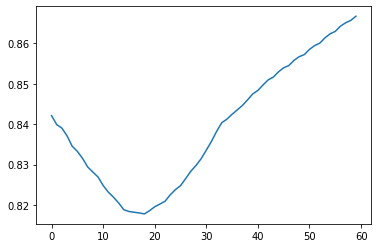

In [ ]:
plt.plot(whole)
plt.show()

In [ ]:
evalSmooth(150)

[0.8335787836298794, 466]

In [ ]:
evalSmooth(180)

[0.8672138999898308, 456]

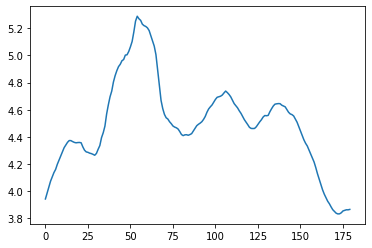

In [ ]:
plt.plot(ma[456:456+180])

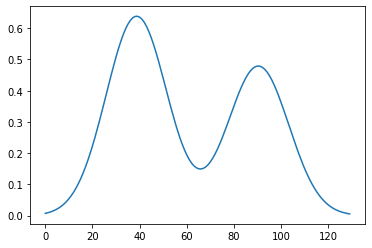

In [ ]:
fin = pattern(130, 0.8, 0.6, 0, 0.5, 2, 0.5)
plt.plot(fin)

In [ ]:
eval(180)

[0.7510228438366027, 449]

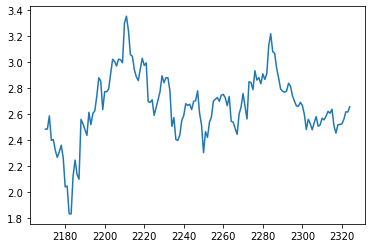

In [ ]:
plt.plot(nasd['Close'][2170:2170+155])

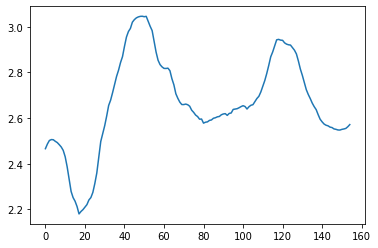

In [ ]:
plt.plot(ma[2170:2170+155])

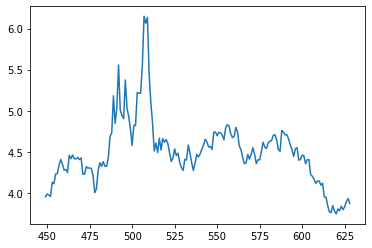

In [ ]:
plt.plot(nasd['Close'][449:449+180])

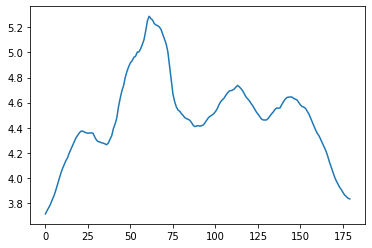

In [ ]:
plt.plot(ma[449:449+180])

In [ ]:
bounds1 = np.asarray([[100, 125]])
bounds2 = np.asarray([[125, 150]])
bounds3 = np.asarray([[150, 175]])
bounds4 = np.asarray([[175, 200]])

sol1 = hillclimbing(eval, bounds1, 40, 4)
sol2 = hillclimbing(eval, bounds2, 40, 4)
sol3 = hillclimbing(eval, bounds3, 40, 4)
sol4 = hillclimbing(eval, bounds4, 40, 4)

>0 f([120.4063027]) = 0.79204
>2 f([125.92451561]) = 0.79849
>3 f([125.14891682]) = 0.79849
>5 f([130.03929812]) = 0.80365
>9 f([140.64204156]) = 0.80664
>10 f([142.44718186]) = 0.80827
>12 f([142.16955406]) = 0.80827
>14 f([148.07010964]) = 0.81151
>17 f([148.78517939]) = 0.81151
>25 f([147.2120258]) = 0.81152
>37 f([147.45856089]) = 0.81152
>0 f([147.53706028]) = 0.81152
>2 f([147.89165225]) = 0.81152
>9 f([147.80928289]) = 0.81152
>18 f([147.11572573]) = 0.81152
>22 f([147.50643621]) = 0.81152
>31 f([147.0382126]) = 0.81152
>0 f([148.87863995]) = 0.81151
>12 f([147.44292178]) = 0.81152
>13 f([147.0404202]) = 0.81152
>14 f([147.23485499]) = 0.81152
>1 f([182.07537995]) = 0.80795
>3 f([187.65136527]) = 0.80804
>4 f([187.47162322]) = 0.80804
>8 f([186.3509127]) = 0.80812
>9 f([184.69256357]) = 0.80833
>12 f([185.96531597]) = 0.80849
>15 f([185.39869186]) = 0.80849
>17 f([185.186452]) = 0.80849
>20 f([185.51390384]) = 0.80849
>27 f([185.73373878]) = 0.80849
>28 f([185.09184134]) = 0.808

In [ ]:
eval(180)

[0.8462396835450192, 1612]

In [ ]:
eval(140)

[0.7958476772483352, 2373]

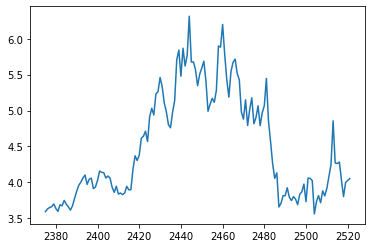

In [ ]:
plt.plot(nasd['Close'][2375:2375+147])

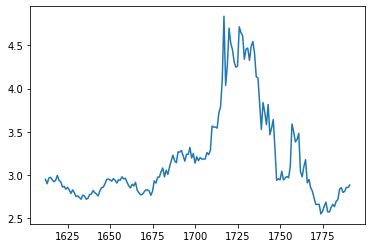

In [ ]:
plt.plot(nasd['Close'][1612:1612+180])

In [ ]:
nasd.iloc[2375]

index            178
Date      2021-06-28
Close          3.593
Volume      156940.0
Open           3.525
High           3.653
Low            3.505
SMA         3.696621
EMA          3.61552
MACD       -0.087072
Name: 2375, dtype: object

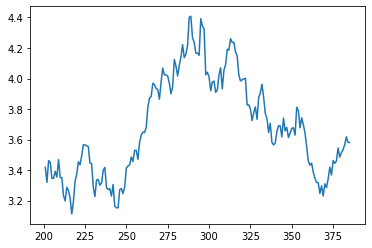

In [ ]:
plt.plot(nasd['Close'][201:201+185])

In [ ]:
nasd.iloc[201]

index           2352
Date      2012-12-18
Close          3.418
Volume      106427.0
Open            3.42
High            3.45
Low            3.336
SMA         4.398914
EMA         4.005192
MACD       -0.450594
Name: 201, dtype: object